In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis exploratorio de datos

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### ¿Cómo se distribuyen las clases en la variable objetivo?

In [6]:
#Distribución de las clases en la variable objetivo (si hay variable objetivo)
target_distribution = df['SaleCondition'].value_counts()
print("Distribución de clases en la variable objetivo:\n", target_distribution)

Distribución de clases en la variable objetivo:
 SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64


##### ¿Cuál es la relación entre las variables númericas?

In [7]:
#Relación entre variables numéricas
correlation_matrix = df[['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].corr()
print("\nMatriz de correlación entre variables numéricas:\n", correlation_matrix)


Matriz de correlación entre variables numéricas:
              LotFrontage   LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage     1.000000  0.426095    0.233633    0.049900   0.132644   
LotArea         0.426095  1.000000    0.214103    0.111170  -0.002618   
BsmtFinSF1      0.233633  0.214103    1.000000   -0.050117  -0.495251   
BsmtFinSF2      0.049900  0.111170   -0.050117    1.000000  -0.209294   
BsmtUnfSF       0.132644 -0.002618   -0.495251   -0.209294   1.000000   
TotalBsmtSF     0.392075  0.260833    0.522396    0.104810   0.415360   

             TotalBsmtSF  
LotFrontage     0.392075  
LotArea         0.260833  
BsmtFinSF1      0.522396  
BsmtFinSF2      0.104810  
BsmtUnfSF       0.415360  
TotalBsmtSF     1.000000  


In [8]:
#Exploración de la calidad de la vivienda
quality_distribution = df[['OverallQual', 'OverallCond']].apply(pd.Series.value_counts)
print("\nDistribución de calidad de la vivienda:\n", quality_distribution)


Distribución de calidad de la vivienda:
     OverallQual  OverallCond
1             2          1.0
2             3          5.0
3            20         25.0
4           116         57.0
5           397        821.0
6           374        252.0
7           319        205.0
8           168         72.0
9            43         22.0
10           18          NaN


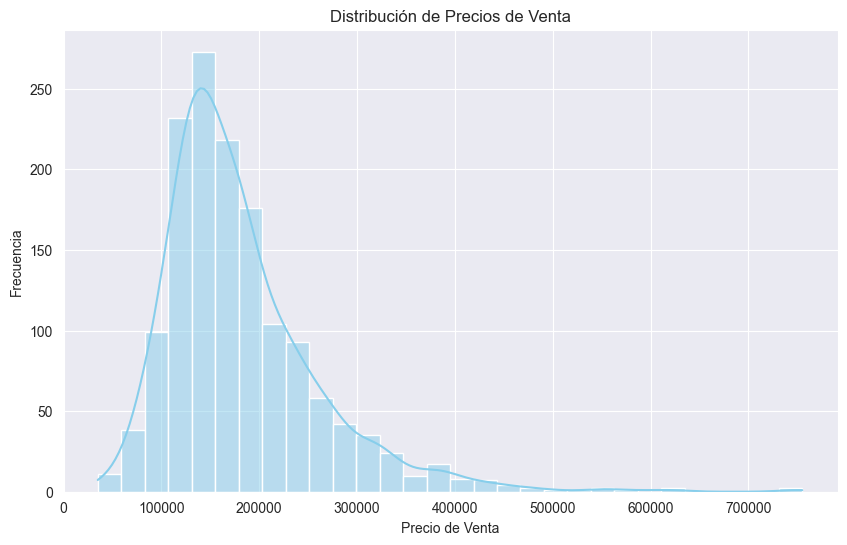

In [9]:
# Histograma de distribución de Precios de Venta
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

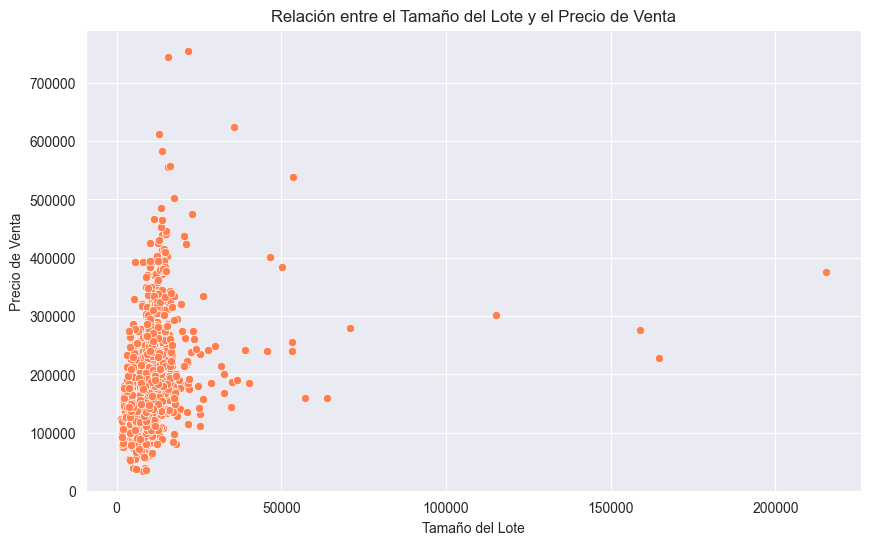

In [10]:
#Diagrama de Dispersión para la relación entre el Tamaño del Lote y el Precio de Venta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df, color='coral')
plt.title('Relación entre el Tamaño del Lote y el Precio de Venta')
plt.xlabel('Tamaño del Lote')
plt.ylabel('Precio de Venta')
plt.show()

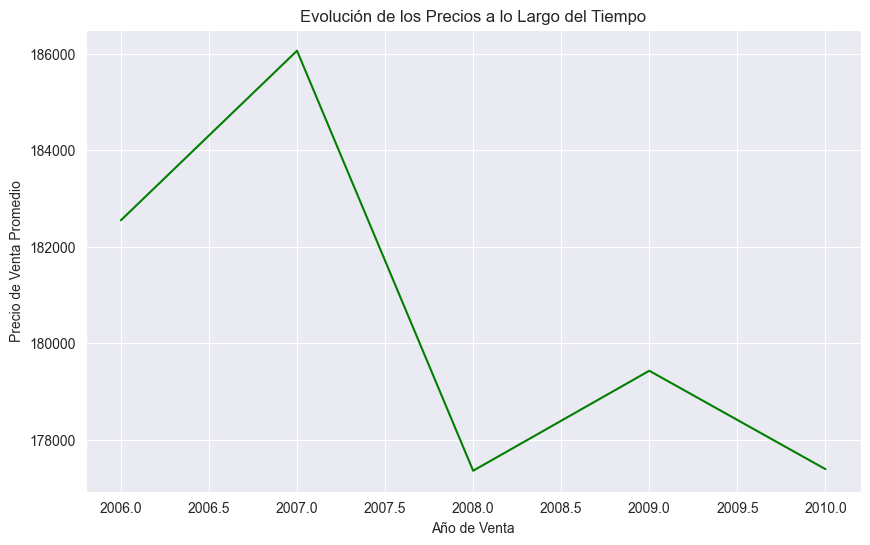

In [11]:
#Gráfica de línea para la evolución de los Precios a lo Largo del Tiempo
yearly_prices = df.groupby('YrSold')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_prices.index, y=yearly_prices.values, color='green')
plt.title('Evolución de los Precios a lo Largo del Tiempo')
plt.xlabel('Año de Venta')
plt.ylabel('Precio de Venta Promedio')
plt.show()

C:\Users\casti\AppData\Local\Temp\ipykernel_5040\81581107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='coolwarm')


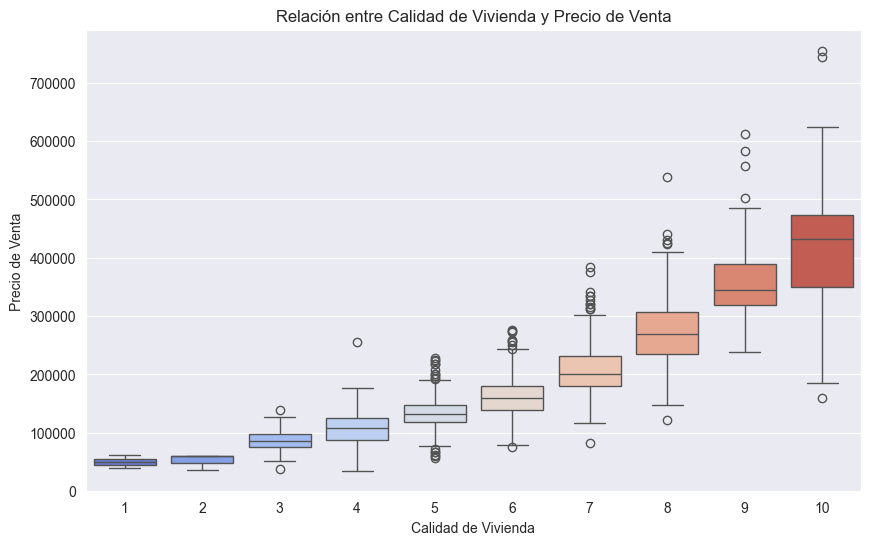

In [12]:
#Gráfico de caja para la relación entre Calidad de Vivienda y Precio de Venta
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='coolwarm')
plt.title('Relación entre Calidad de Vivienda y Precio de Venta')
plt.xlabel('Calidad de Vivienda')
plt.ylabel('Precio de Venta')
plt.show()

In [13]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
# Fill NaN's with 0's
df[numeric_features.columns] = df[numeric_features.columns].fillna(0)

In [15]:
# Those who aren't numeric are categorical
categorical_features = df.select_dtypes(exclude=[np.number])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
# Fill NaN's with "NA"
df[categorical_features.columns] = df[categorical_features.columns].fillna("NA")

## Encoding

In [17]:
categorical_features.fillna("NA", inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
# NA Will be replaced with 0
# For ordinal data, the greater the value, the better the quality

df["MSZoning"] = le.fit_transform(df["MSZoning"])
df["Street"] = le.fit_transform(df["Street"])
df["Alley"] = le.fit_transform(df["Alley"])
df["LotShape"] = le.fit_transform(df["LotShape"])
df["LandContour"] = le.fit_transform(df["LandContour"])
df["Utilities"] = le.fit_transform(df["Utilities"])
df["LotConfig"] = le.fit_transform(df["LotConfig"])
df["LandSlope"] = df["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])
df["Condition1"] = le.fit_transform(df["Condition1"])
df["Condition2"] = le.fit_transform(df["Condition2"])
df["BldgType"] = le.fit_transform(df["BldgType"])
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
df["ExterQual"] = df["ExterQual"].map(condition_map)
df["ExterCond"] = df["ExterCond"].map(condition_map)
df["Foundation"] = le.fit_transform(df["Foundation"])
df["BsmtQual"] = df["BsmtQual"].map(condition_map)
df["BsmtCond"] = df["BsmtCond"].map(condition_map)
df["BsmtExposure"] = df["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
df["BsmtFinType1"] = df["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
df["BsmtFinType2"] = df["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
df["Heating"] = le.fit_transform(df["Heating"])
df["HeatingQC"] = df["HeatingQC"].map(condition_map)
df["CentralAir"] = le.fit_transform(df["CentralAir"])
df["Electrical"] = df["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
df["KitchenQual"] = df["KitchenQual"].map(condition_map)
df["Functional"] = le.fit_transform(df["Functional"])
df["FireplaceQu"] = df["FireplaceQu"].map(condition_map)
df["GarageType"] = le.fit_transform(df["GarageType"])
df["GarageFinish"] = df["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
df["GarageQual"] = df["GarageQual"].map(condition_map)
df["GarageCond"] = df["GarageCond"].map(condition_map)
df["PavedDrive"] = df["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
df["PoolQC"] = df["PoolQC"].map(condition_map)
df["Fence"] = df["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])
df["SaleType"] = le.fit_transform(df["SaleType"])
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Después del encoding, se observa que hay _features_ donde son todos NaN's, serán eliminados.

In [21]:
corr = df.corr()
corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.019761,-0.033226,0.008916,-0.002855,0.032122,-0.019659,0.013324,...,0.057044,0.047655,-0.006632,-0.038103,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.215023,-0.139781,-0.024969,0.099430,0.119289,-0.002940,-0.022844,...,0.008283,0.014198,-0.084980,-0.046881,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.051250,-0.034452,0.087654,-0.368086,0.061887,-0.017854,-0.001192,...,-0.003128,-0.003016,0.069542,-0.005553,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.019761,-0.215023,-0.051250,1.000000,0.100739,-0.025107,-0.044618,0.163570,-0.066957,-0.043535,...,0.114106,0.150254,0.008687,-0.016789,-0.059606,0.018942,-0.012094,-0.043808,0.054221,0.209624
LotArea,-0.033226,-0.139781,-0.034452,0.100739,1.000000,-0.197131,-0.029676,-0.165315,-0.149083,0.010123,...,0.077672,0.091727,-0.041423,0.106135,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.018942,0.001205,0.003690,-0.011274,-0.033455,-0.011599,-0.051552,...,-0.033737,-0.032397,-0.004400,0.013957,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,-0.012094,-0.014261,-0.025043,0.015176,0.036449,0.020507,0.023353,...,-0.059689,-0.050292,0.048068,0.057708,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,-0.043808,0.012292,0.014339,0.001092,-0.000911,-0.025754,-0.126770,...,0.011009,0.007654,0.005225,-0.003340,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.054221,0.034169,0.006064,-0.000162,-0.038118,0.033809,-0.089701,...,-0.067251,-0.088047,-0.102592,-0.008074,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


## Selección de predictores

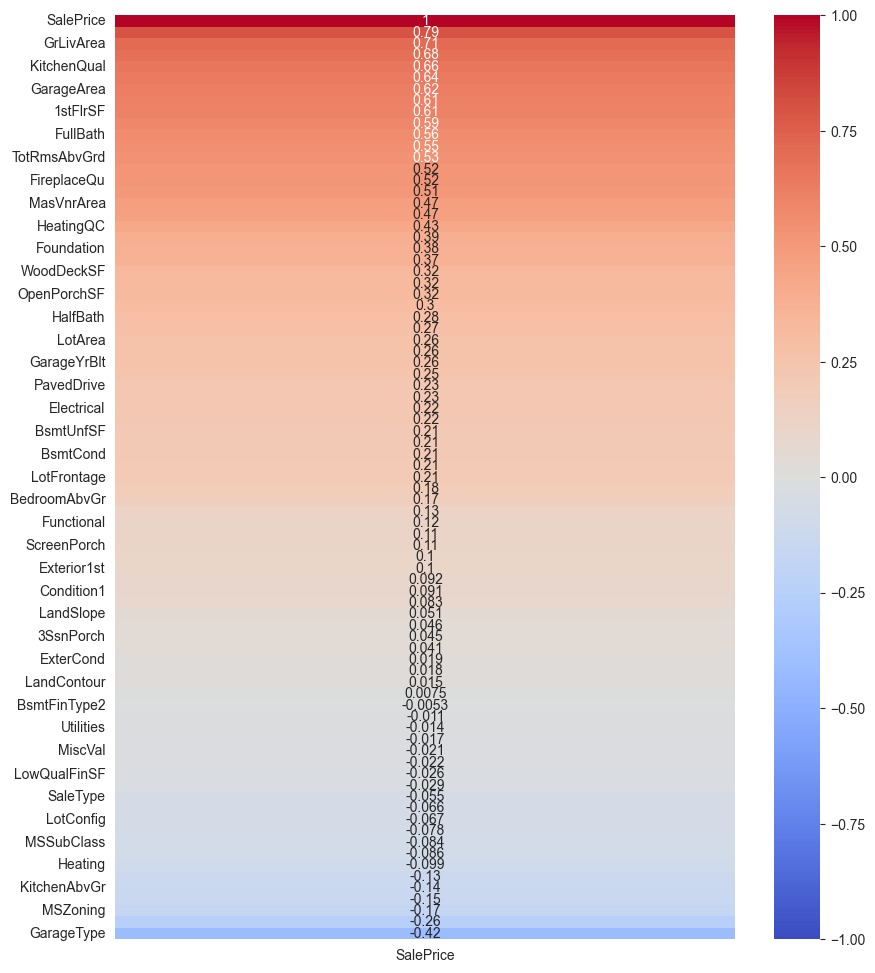

In [22]:
import seaborn as sns

plt.figure(figsize=(10, 12))

sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            vmin=-1, vmax=1, cmap='coolwarm', annot=True)

plt.show()

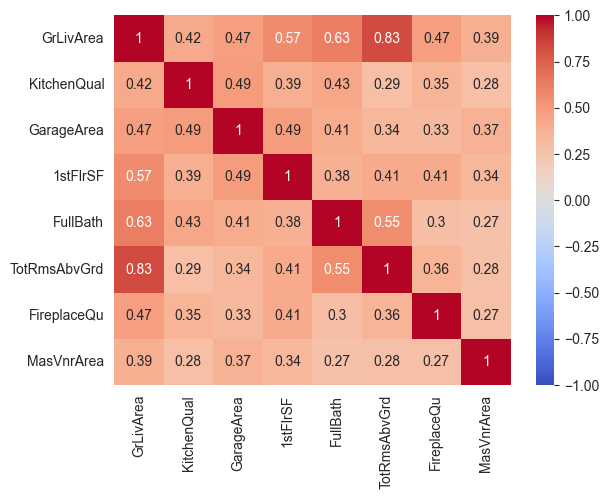

In [23]:
selected_predictors = df[['GrLivArea', 'KitchenQual', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'FireplaceQu', 'MasVnrArea']]
predictors_corr = selected_predictors.corr()
sns.heatmap(predictors_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [24]:
useful_predictors = df[['KitchenQual', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'FireplaceQu', 'MasVnrArea']]

## Escalamiento

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
y = df['SalePrice']
X = useful_predictors

X = scaler.fit_transform(X)

In [28]:
X

array([[ 0.73599434,  0.35100032, -0.79343379, ...,  0.91220977,
        -1.00833355,  0.51410389],
       [-0.77109084, -0.06073101,  0.25714043, ..., -0.31868327,
         0.64889007, -0.57075013],
       [ 0.73599434,  0.63172623, -0.62782603, ..., -0.31868327,
         0.64889007,  0.32591493],
       ...,
       [ 0.73599434, -1.03391416,  0.06565646, ...,  1.52765629,
         1.20129794, -0.57075013],
       [ 0.73599434, -1.09005935, -0.21898188, ..., -0.93412978,
        -1.00833355, -0.57075013],
       [-0.77109084, -0.9216238 ,  0.2416147 , ..., -0.31868327,
        -1.00833355, -0.57075013]])

# Modelado

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluación

In [32]:
y_pred = model.predict(X_test)

In [33]:
explained_variance = model.score(X_test, y_test)
mean_squared_log_error = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
mean_absolute_error = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
aic = len(y_test) * np.log(mean_squared_error(y_test, y_pred)) + 2 * len(useful_predictors.columns)
bic = len(y_test) * np.log(mean_squared_error(y_test, y_pred)) + len(useful_predictors.columns) * np.log(len(y_test))

In [34]:
print(f'Explained Variance: {explained_variance}')
print(f'Mean Squared Log Error: {mean_squared_log_error}')
print(f'R2: {r2}')
print(f'Mean Absolute Error: {mean_absolute_error}')
print(f'Mean Squared Error: {mse}')
print(f'AIC: {aic}')
print(f'BIC: {bic}')

Explained Variance: 0.7575716949961926
Mean Squared Log Error: 1691687442.6221592
R2: 0.7575716949961926
Mean Absolute Error: 1691687442.6221592
Mean Squared Error: 1691687442.6221592
AIC: 9321.058651263878
BIC: 9349.634183636514


## Análisis de Residuales

In [35]:
residuals = y_test - y_pred

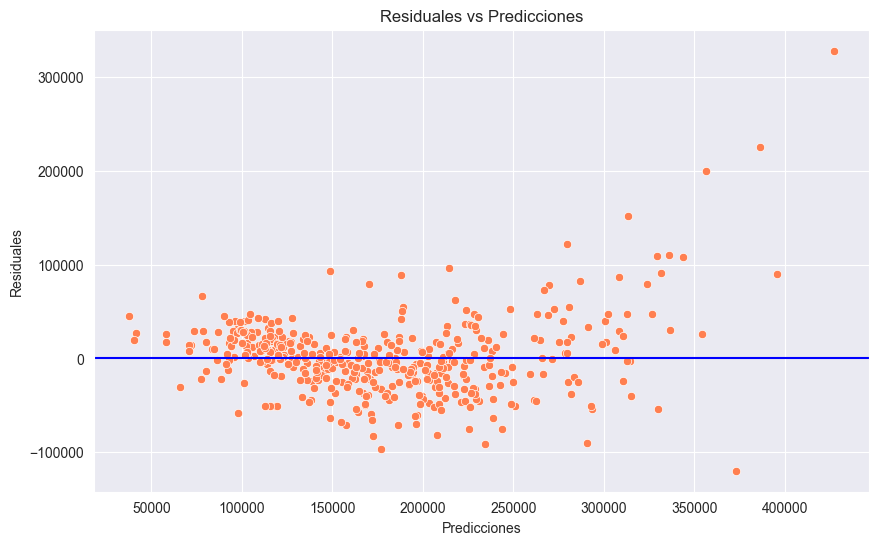

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='coral')
plt.axhline(0,color='blue')
plt.title('Residuales vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.show()

Podemos observar homoscedasticidad de los residuos, lo que indica que el modelo no tiene problemas de varianza. Sin embargo, se aprecian algunos _outliers_.

In [37]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

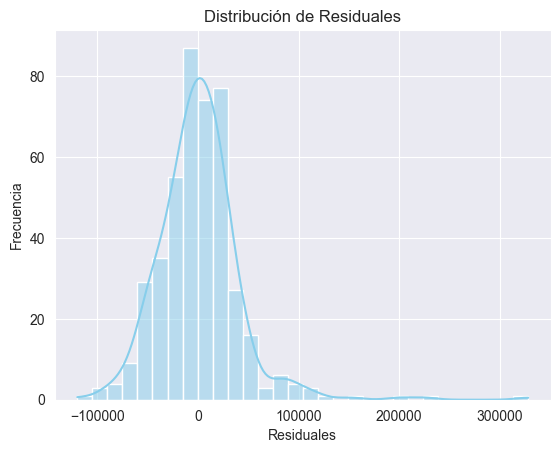

In [38]:
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title('Distribución de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.show()

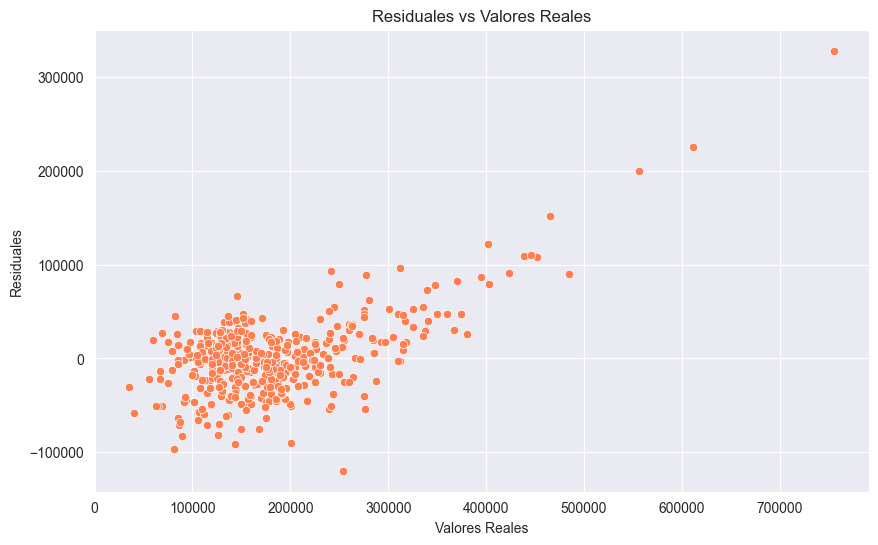

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, color='coral')
plt.title('Residuales vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')
plt.show()

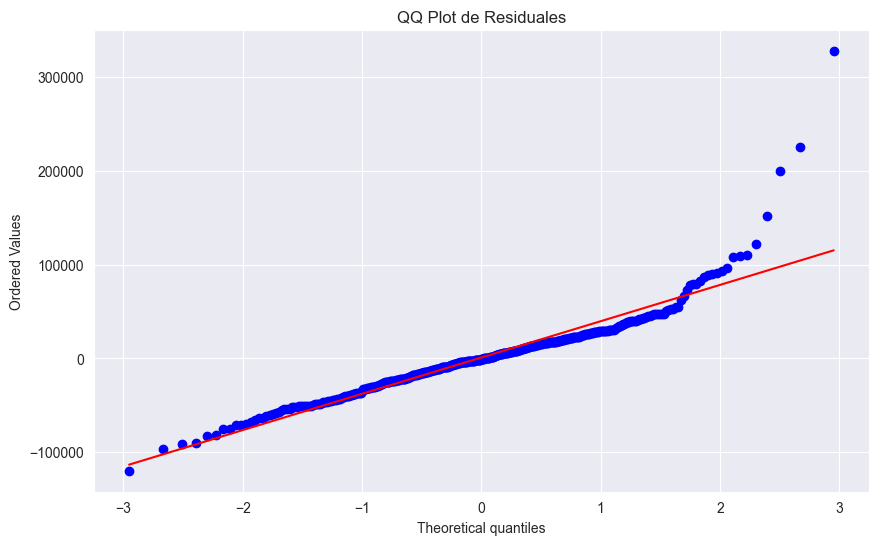

In [40]:
# QQ Plot
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot de Residuales')
plt.show()

La gráfica QQ nos muestra que los residuos siguen una distribución normal, con algunos _outliers_.

## Lasso Model

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [43]:
y_pred_lasso = lasso.predict(X_test)

In [44]:
explained_variance_lasso = lasso.score(X_test, y_test)
mean_squared_log_error_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = lasso.score(X_test, y_test)
mean_absolute_error_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
aic_lasso = len(y_test) * np.log(mean_squared_error(y_test, y_pred_lasso)) + 2 * len(useful_predictors.columns)
bic_lasso = len(y_test) * np.log(mean_squared_error(y_test, y_pred_lasso)) + len(useful_predictors.columns) * np.log(len(y_test))

In [45]:
print(f'Explained Variance: {explained_variance_lasso}')
print(f'Mean Squared Log Error: {mean_squared_log_error_lasso}')
print(f'R2: {r2_lasso}')
print(f'Mean Absolute Error: {mean_absolute_error_lasso}')
print(f'Mean Squared Error: {mse_lasso}')
print(f'AIC: {aic_lasso}')
print(f'BIC: {bic_lasso}')

Explained Variance: 0.7575714285253244
Mean Squared Log Error: 1691689302.0808623
R2: 0.7575714285253244
Mean Absolute Error: 1691689302.0808623
Mean Squared Error: 1691689302.0808623
AIC: 9321.059132701786
BIC: 9349.634665074422


In [46]:
residuals_lasso = y_test - y_pred_lasso

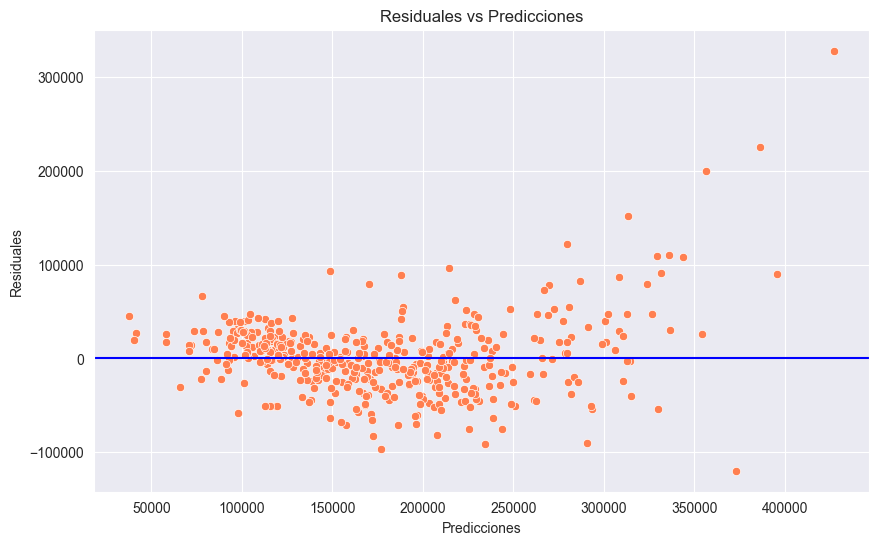

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lasso, y=residuals_lasso, color='coral')
plt.axhline(0,color='blue')
plt.title('Residuales vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.show()

Podemos observar homoscedasticidad de los residuos, lo que indica que el modelo no tiene problemas de varianza. Sin embargo, se aprecian algunos _outliers_.

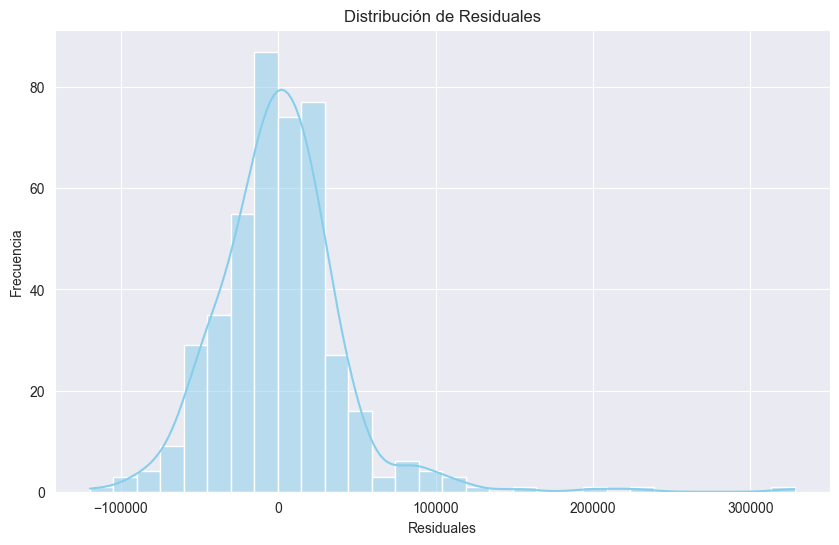

In [48]:
plt.figure(figsize=(10, 6))

sns.histplot(residuals_lasso, bins=30, kde=True, color='skyblue')
plt.title('Distribución de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.show()

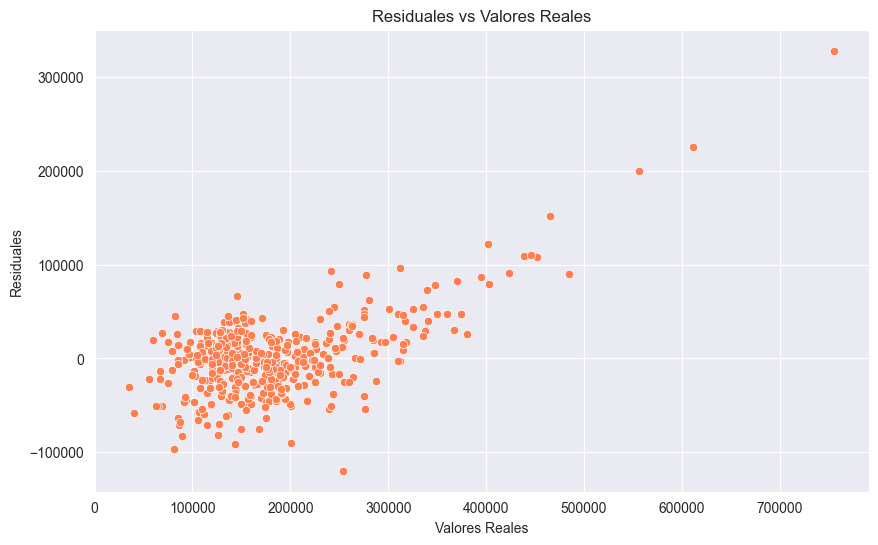

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_lasso, color='coral')
plt.title('Residuales vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')
plt.show()

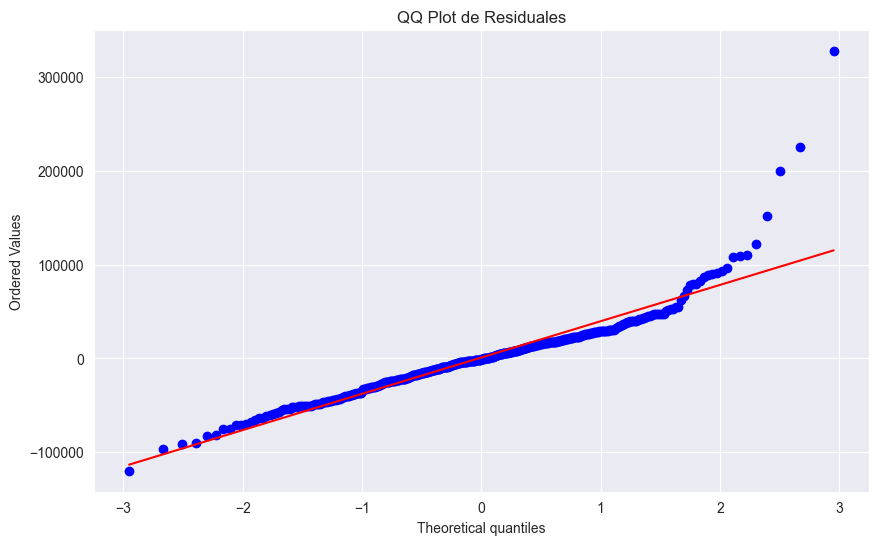

In [50]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals_lasso, dist="norm", plot=plt)
plt.title('QQ Plot de Residuales')
plt.show()

Con las siguientes gráficas también hemos comprobado que los residuos siguen una distribución normal; de nuevo, contando algunos outliers.

## Ridge Model

In [51]:
from sklearn.linear_model import Ridge

In [52]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [53]:
y_pred_ridge = ridge.predict(X_test)

In [54]:
explained_variance_ridge = ridge.score(X_test, y_test)
mean_squared_log_error_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = ridge.score(X_test, y_test)
mean_absolute_error_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
aic_ridge = len(y_test) * np.log(mean_squared_error(y_test, y_pred_ridge)) + 2 * len(useful_predictors.columns)
bic_ridge = len(y_test) * np.log(mean_squared_error(y_test, y_pred_ridge)) + len(useful_predictors.columns) * np.log(len(y_test))

In [55]:
print(f'Explained Variance: {explained_variance_ridge}')
print(f'Mean Squared Log Error: {mean_squared_log_error_ridge}')
print(f'R2: {r2_ridge}')
print(f'Mean Absolute Error: {mean_absolute_error_ridge}')
print(f'Mean Squared Error: {mse_ridge}')
print(f'AIC: {aic_ridge}')
print(f'BIC: {bic_ridge}')

Explained Variance: 0.7575686877415929
Mean Squared Log Error: 1691708427.526719
R2: 0.7575686877415929
Mean Absolute Error: 1691708427.526719
Mean Squared Error: 1691708427.526719
AIC: 9321.064084496375
BIC: 9349.63961686901


In [56]:
residuals_ridge = y_test - y_pred_ridge

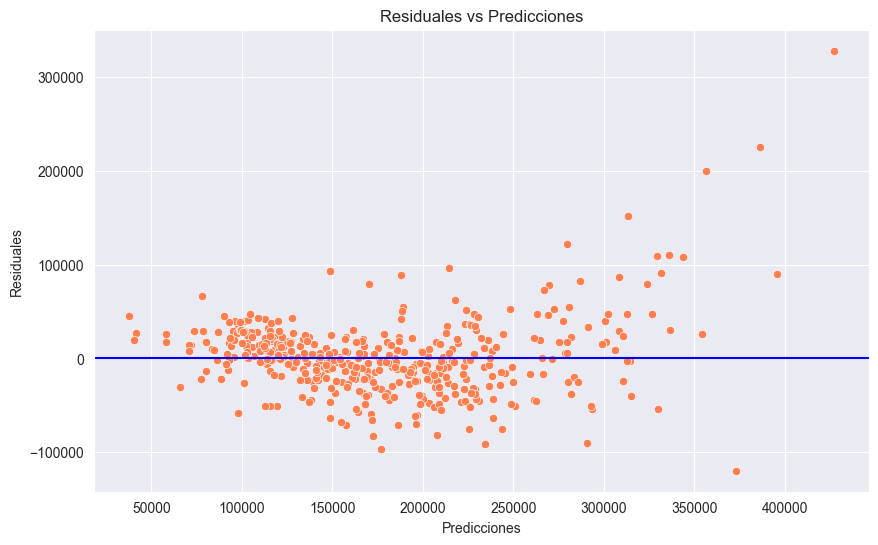

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge, color='coral')
plt.axhline(0,color='blue')
plt.title('Residuales vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.show()

De la misma manera que los modelos anteriores, el modelo de Ridge tiene un comportamiento similar, con una distribución normal de los residuales y algunos _outliers_.

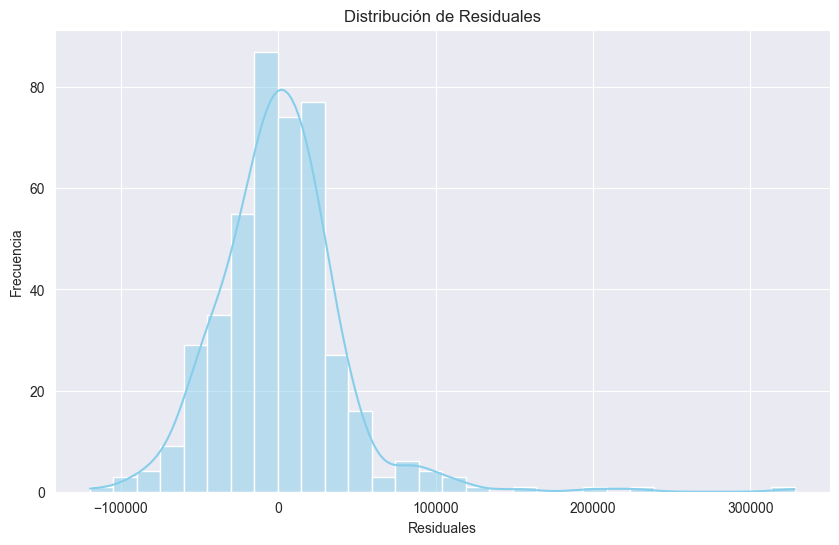

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ridge, bins=30, kde=True, color='skyblue')
plt.title('Distribución de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.show()

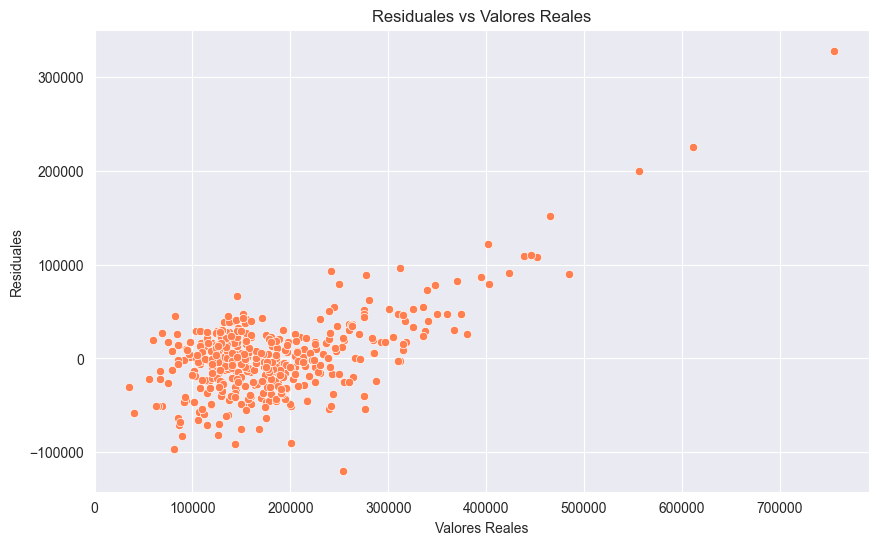

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_ridge, color='coral')
plt.title('Residuales vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')
plt.show()

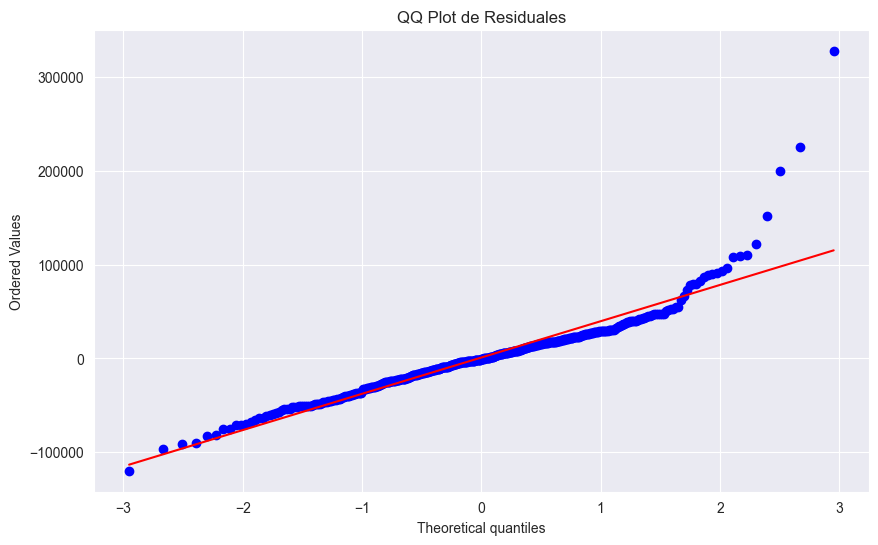

In [60]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals_ridge, dist="norm", plot=plt)
plt.title('QQ Plot de Residuales')
plt.show()

Se puede observar el supuesto de normalidad de los residuales, con algunos _outliers_.

## ElasticNet Model

In [61]:
from sklearn.linear_model import ElasticNet

In [62]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [63]:
y_pred_elastic_net = elastic_net.predict(X_test)

In [64]:
explained_variance_elastic_net = elastic_net.score(X_test, y_test)
mean_squared_log_error_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = elastic_net.score(X_test, y_test)
mean_absolute_error_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
aic_elastic_net = len(y_test) * np.log(mean_squared_error(y_test, y_pred_elastic_net)) + 2 * len(useful_predictors.columns)
bic_elastic_net = len(y_test) * np.log(mean_squared_error(y_test, y_pred_elastic_net)) + len(useful_predictors.columns) * np.log(len(y_test))

In [65]:
print(f'Explained Variance: {explained_variance_elastic_net}')
print(f'Mean Squared Log Error: {mean_squared_log_error_elastic_net}')
print(f'R2: {r2_elastic_net}')
print(f'Mean Absolute Error: {mean_absolute_error_elastic_net}')
print(f'Mean Squared Error: {mse_elastic_net}')
print(f'AIC: {aic_elastic_net}')
print(f'BIC: {bic_elastic_net}')

Explained Variance: 0.7558238505431815
Mean Squared Log Error: 1703884065.094809
R2: 0.7558238505431815
Mean Absolute Error: 1703884065.094809
Mean Squared Error: 1703884065.094809
AIC: 9324.205187041754
BIC: 9352.78071941439


In [66]:
residuals_elastic_net = y_test - y_pred_elastic_net

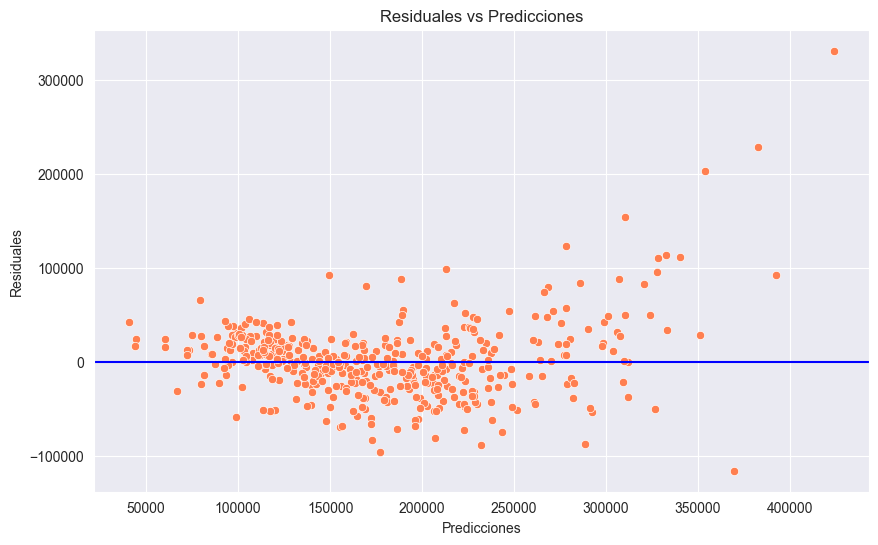

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_elastic_net, y=residuals_elastic_net, color='coral')
plt.axhline(0,color='blue')
plt.title('Residuales vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.show()

Podemos observar que el modelo de ElasticNet tiene un comportamiento similar a los demás modelos, con una distribución normal de los residuales y algunos _outliers_.

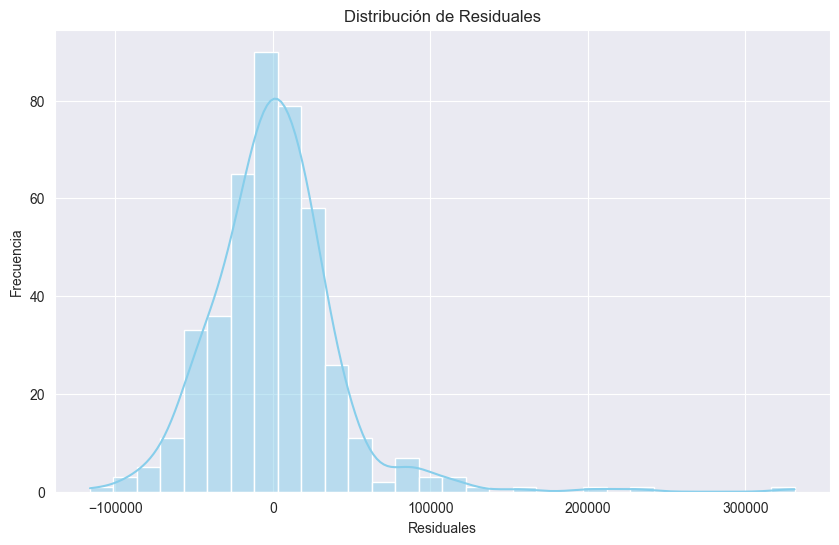

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_elastic_net, bins=30, kde=True, color='skyblue')
plt.title('Distribución de Residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.show()

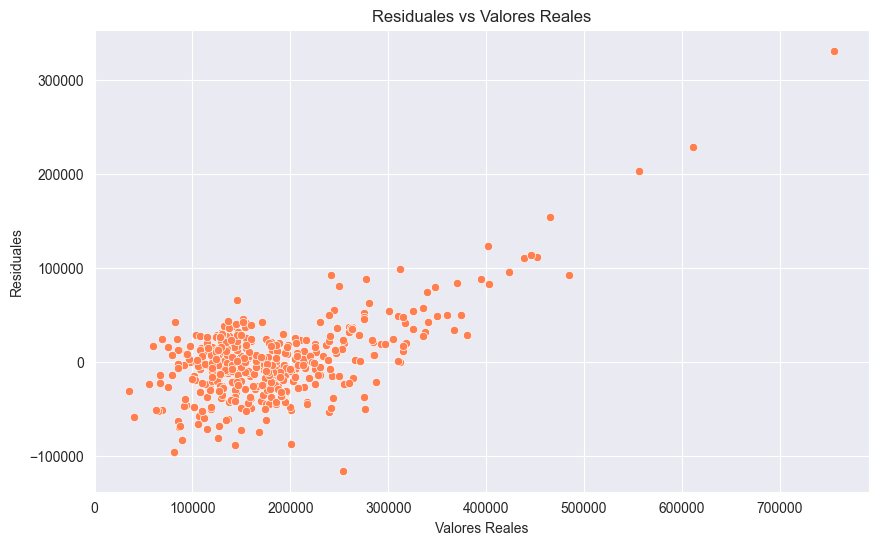

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_elastic_net, color='coral')
plt.title('Residuales vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuales')
plt.show()

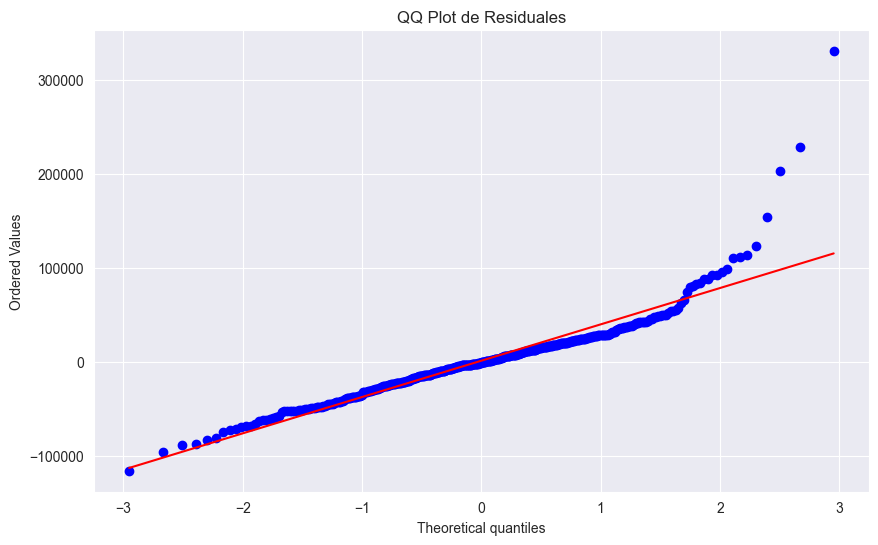

In [70]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals_elastic_net, dist="norm", plot=plt)
plt.title('QQ Plot de Residuales')
plt.show()

De la misma manera, el modelo de ElasticNet tiene un comportamiento similar a los demás modelos, con una distribución normal de los residuales y algunos _outliers_.

## Comparación de Modelos

In [71]:
models = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet']
explained_variance = [explained_variance, explained_variance_lasso, explained_variance_ridge, explained_variance_elastic_net]
mean_squared_log_error = [mean_squared_log_error, mean_squared_log_error_lasso, mean_squared_log_error_ridge, mean_squared_log_error_elastic_net]
r2 = [r2, r2_lasso, r2_ridge, r2_elastic_net]
mean_absolute_error = [mean_absolute_error, mean_absolute_error_lasso, mean_absolute_error_ridge, mean_absolute_error_elastic_net]
mse = [mse, mse_lasso, mse_ridge, mse_elastic_net]
aic = [aic, aic_lasso, aic_ridge, aic_elastic_net]
bic = [bic, bic_lasso, bic_ridge, bic_elastic_net]

In [72]:
comparison = pd.DataFrame({
    'Model': models,
    'Explained Variance': explained_variance,
    'Mean Squared Log Error': mean_squared_log_error,
    'R2': r2,
    'Mean Absolute Error': mean_absolute_error,
    'Mean Squared Error': mse,
    'AIC': aic,
    'BIC': bic
})

In [73]:
comparison

,Model,Explained Variance,Mean Squared Log Error,R2,Mean Absolute Error,Mean Squared Error,AIC,BIC
0,Linear Regression,0.757572,1.691687e+09,0.757572,1.691687e+09,1.691687e+09,9321.058651,9349.634184
1,Lasso,0.757571,1.691689e+09,0.757571,1.691689e+09,1.691689e+09,9321.059133,9349.634665
2,Ridge,0.757569,1.691708e+09,0.757569,1.691708e+09,1.691708e+09,9321.064084,9349.639617
3,ElasticNet,0.755824,1.703884e+09,0.755824,1.703884e+09,1.703884e+09,9324.205187,9352.780719


## Conclusiones

Podemos observar que el desempeño de los diferentes modelos es bastante similar, destacando que el modelo de regresión linear hecho por nosotros tiene un _performance_ ligeramente más alto a los demás. Todos tienen valores similares y es completamente destacable el error obtenido por el modelo. Estamos conscientes de ello y el trabajo que se requiere en la selección de variables y el preprocesamiento de los datos para obtener un mejor modelo. Lo que podemos afirmar es que el modelo no posee _overfitting_ y puede predecir correctamente el 75% de los datos. Es necesario también prestar más atención a los _outliers_, los cuales puedes estar sesgando el modelo.